In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
A = pd.read_csv("sigma_cabs.csv")
A.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [5]:
A.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [6]:
A.describe(include = 'object')

,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,111452,111469,131662,131662
unique,131662,5,3,14,2
top,T0005689460,B,B,A,Male
freq,1,31136,40355,77597,93900


In [7]:
A.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

### Treating Null Values

#### Type_of_Cab                    

In [8]:
A.Type_of_Cab.isna().sum()               

20210

In [9]:
A.Type_of_Cab.value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [13]:
A.Type_of_Cab.mode()

0    B
Name: Type_of_Cab, dtype: object

In [17]:
# Filling null values with highest frequency of the Type of cahb
A.Type_of_Cab = A.Type_of_Cab.fillna('B')

In [18]:
A.Type_of_Cab.isna().sum() 

0

In [19]:
A.Type_of_Cab.value_counts()

B    51346
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

## Customer_Since_Months

In [20]:
A.Customer_Since_Months.dtype

dtype('float64')

In [21]:
A.Customer_Since_Months.value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='Count'>

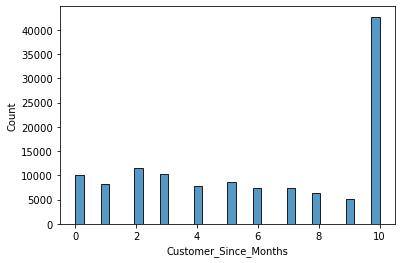

In [23]:
sb.histplot(A.Customer_Since_Months)

<AxesSubplot:xlabel='Customer_Since_Months'>

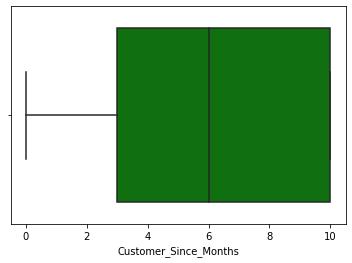

In [26]:
sb.boxplot(A.Customer_Since_Months, color = 'g')

In [27]:
A.Customer_Since_Months.mean()

6.016661099712109

In [28]:
A.Customer_Since_Months.median()

6.0

In [29]:
A.Customer_Since_Months.mode()

0    10.0
Name: Customer_Since_Months, dtype: float64

In [30]:
A.Customer_Since_Months = A.Customer_Since_Months.fillna(A.Customer_Since_Months.median())

In [31]:
A.Customer_Since_Months.isna().sum()

0

## Life_Style_Index


In [33]:
A.Life_Style_Index.dtype

dtype('float64')

In [35]:
A.Life_Style_Index.isna().sum()

20193

<AxesSubplot:xlabel='Life_Style_Index', ylabel='Count'>

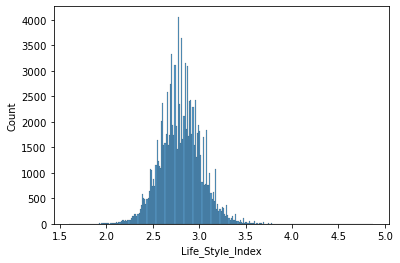

In [36]:
sb.histplot(A.Life_Style_Index)

<AxesSubplot:xlabel='Life_Style_Index'>

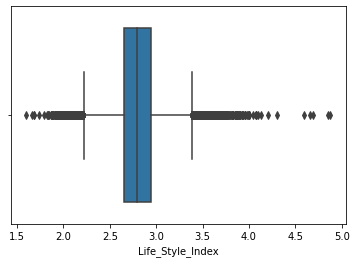

In [37]:
sb.boxplot(A.Life_Style_Index)

In [39]:
A.Life_Style_Index.quantile(1)

4.87511

In [40]:
A.Life_Style_Index.max()

4.87511

In [41]:
A.Life_Style_Index.min()

1.59638

In [46]:
A.Life_Style_Index.quantile(0.25)

2.65473

In [44]:
A.Life_Style_Index.quantile(0.5)

2.79805

In [45]:
A.Life_Style_Index.quantile(0.75)

2.94678

In [47]:
c = 2.94678+1.5*(2.94768-2.65473)
c

3.3862050000000004

In [49]:
b = 2.65473-1.5*(2.94768-2.65473)
b

2.2153049999999994

In [50]:
A.Life_Style_Index = A.Life_Style_Index.fillna(4)

In [51]:
A.Life_Style_Index.isna().sum()

0

## Confidence_Life_Style_Index

In [55]:
A.Confidence_Life_Style_Index.dtype

dtype('O')

In [57]:
A.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [63]:
A.Confidence_Life_Style_Index.mode()

0    B
Name: Confidence_Life_Style_Index, dtype: object

In [64]:
A.Confidence_Life_Style_Index.mode()[0]

'B'

In [66]:
A.Confidence_Life_Style_Index = A.Confidence_Life_Style_Index.fillna('B')

In [67]:
A.Confidence_Life_Style_Index.isna().sum()

0

## Var1

In [68]:
A.Var1.dtype

dtype('float64')

In [73]:
A.Var1.isna().sum()

71030

In [74]:
missing_percentage = (A.Var1.isna().sum()/len(A))*100
missing_percentage

53.948747550546095

<AxesSubplot:xlabel='Var1', ylabel='Count'>

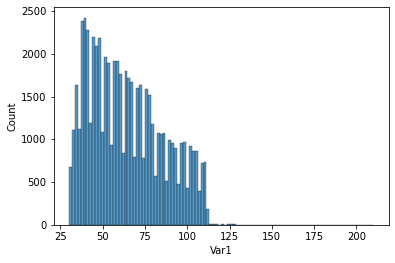

In [69]:
sb.histplot(A.Var1)

<AxesSubplot:xlabel='Var1'>

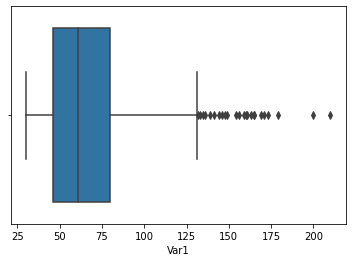

In [70]:
sb.boxplot(A.Var1)

In [71]:
A.Var1.mean()

64.20269824515107

In [72]:
A.Var1.median()

61.0

In [76]:
A.Var1 = A.Var1.fillna(A.Var1.median())

In [77]:
A.Var1.isna().sum()

0

In [78]:
A.isna().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

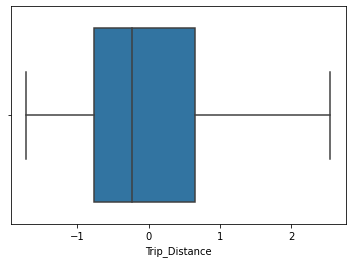

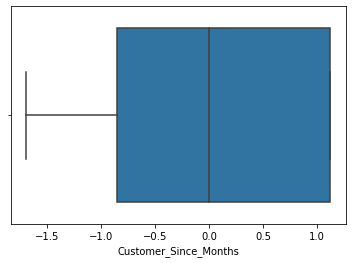

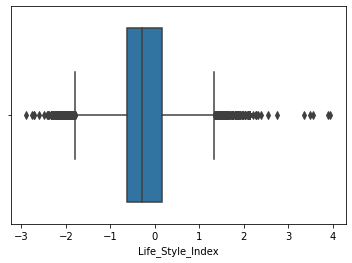

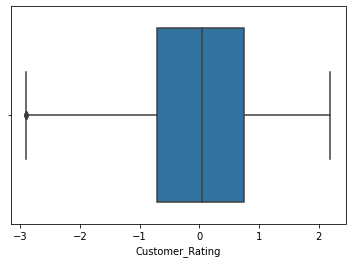

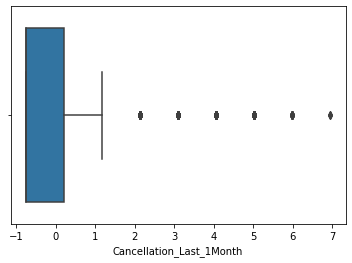

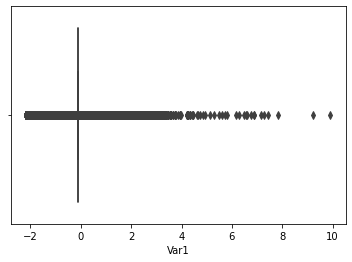

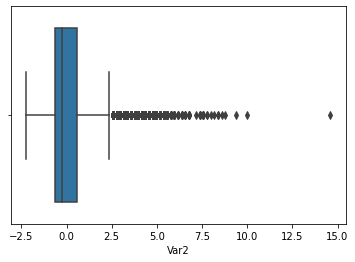

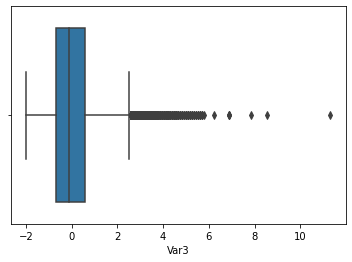

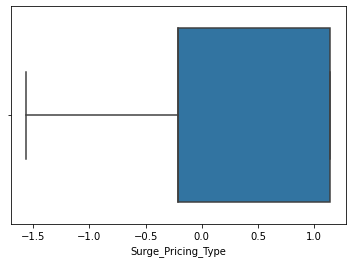

In [111]:
for i in con:
    sb.boxplot(A[i])
    plt.show()

In [80]:
#Drop unique identity columns and separating data into continous and categorical:
A = A.drop(labels=["Trip_ID"],axis=1)
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [81]:
cat

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [82]:
con

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

<AxesSubplot:xlabel='Confidence_Life_Style_Index', ylabel='count'>

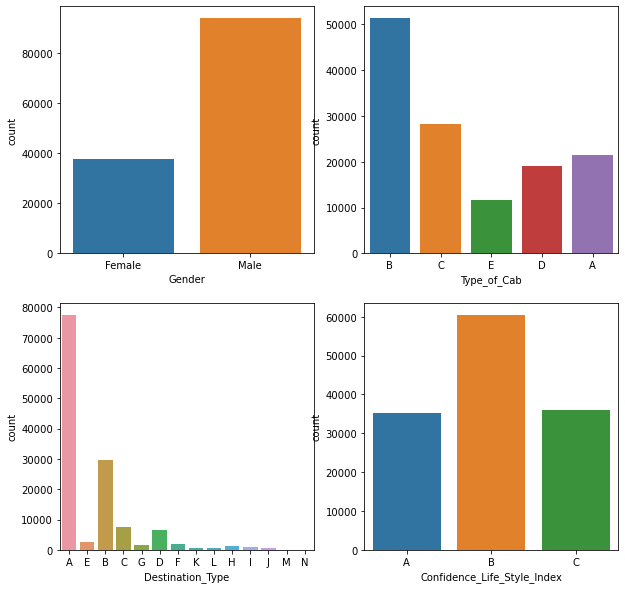

In [85]:
#Data visualizations using chats,plots:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sb.countplot(A.Gender)
plt.subplot(2,2,2)
sb.countplot(A.Type_of_Cab)
plt.subplot(2,2,3)
sb.countplot(A.Destination_Type)
plt.subplot(2,2,4)
sb.countplot(A.Confidence_Life_Style_Index)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='Density'>

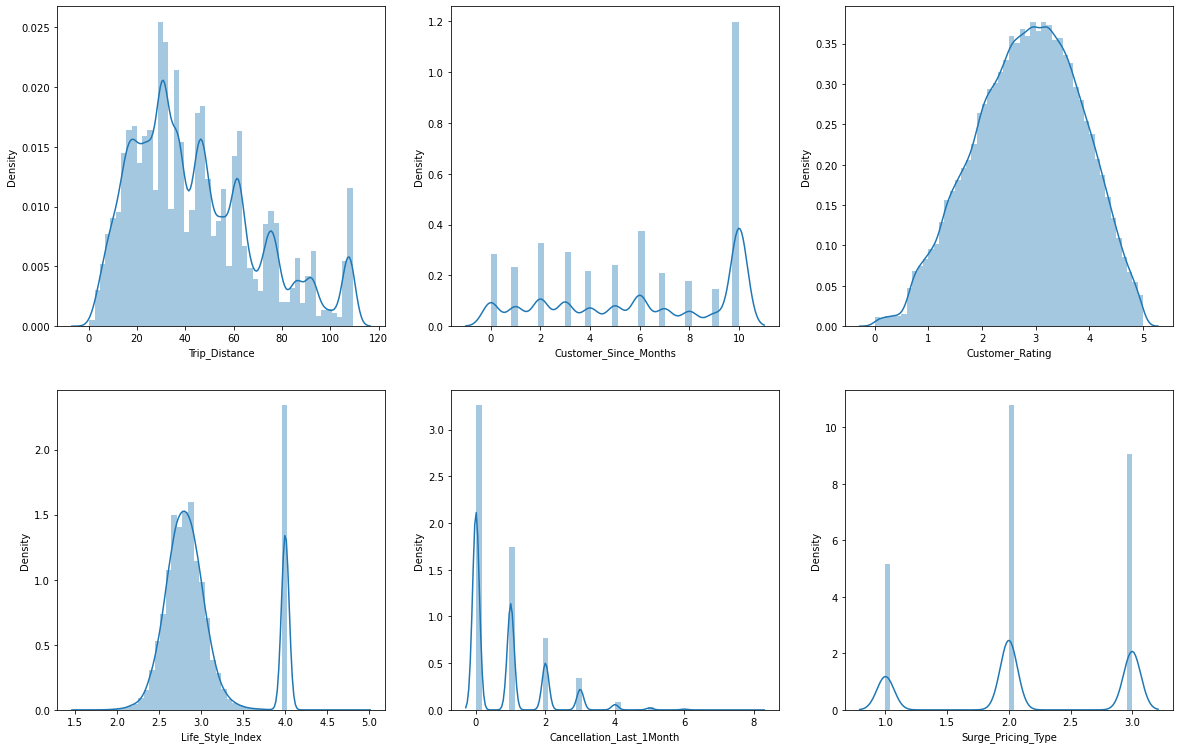

In [86]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sb.distplot(A.Trip_Distance)
plt.subplot(3,3,2)
sb.distplot(A.Customer_Since_Months)
plt.subplot(3,3,3)
sb.distplot(A.Customer_Rating)
plt.subplot(3,3,4)
sb.distplot(A.Life_Style_Index)
plt.subplot(3,3,5)
sb.distplot(A.Cancellation_Last_1Month)
plt.subplot(3,3,6)
sb.distplot(A.Surge_Pricing_Type)

<AxesSubplot:xlabel='Cancellation_Last_1Month', ylabel='count'>

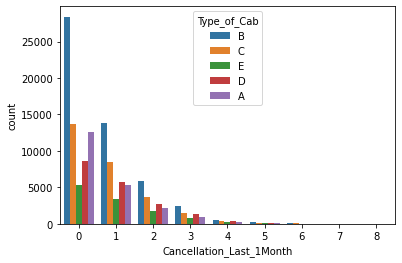

In [87]:
sb.countplot(A.Cancellation_Last_1Month,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Rating', ylabel='Type_of_Cab'>

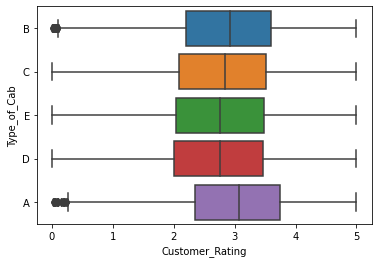

In [88]:
sb.boxplot(A.Customer_Rating,A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='count'>

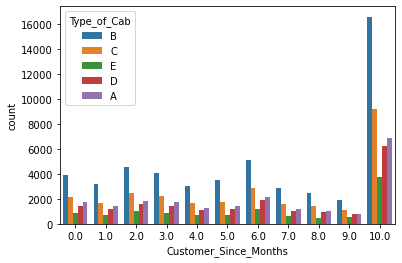

In [89]:
sb.countplot(A.Customer_Since_Months,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='count'>

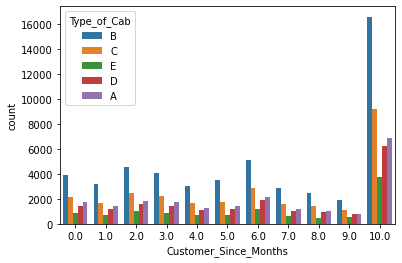

In [90]:
sb.countplot(A.Customer_Since_Months,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Destination_Type', ylabel='count'>

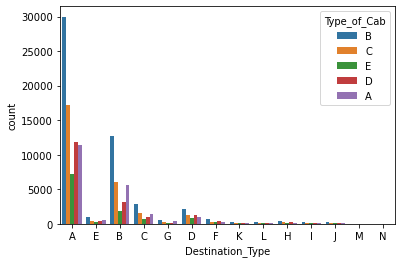

In [91]:
sb.countplot(A.Destination_Type,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Trip_Distance', ylabel='Type_of_Cab'>

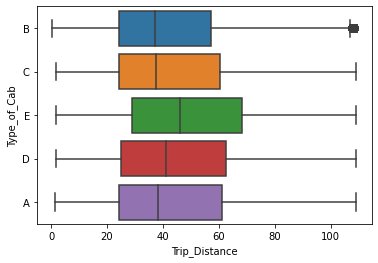

In [92]:
sb.boxplot(A.Trip_Distance, A.Type_of_Cab)

<AxesSubplot:xlabel='Confidence_Life_Style_Index', ylabel='count'>

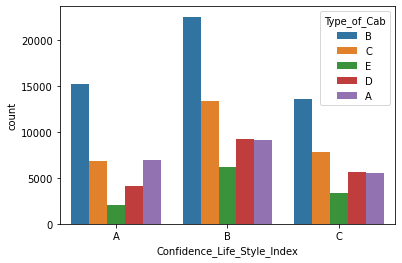

In [93]:
sb.countplot(A.Confidence_Life_Style_Index,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

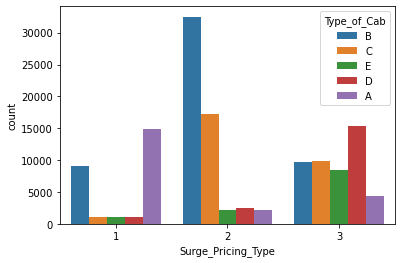

In [94]:
sb.countplot(A.Surge_Pricing_Type,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

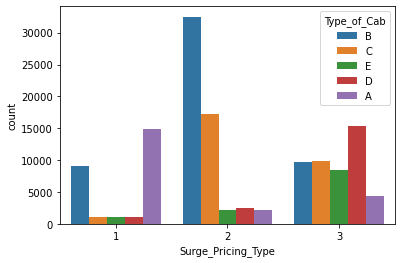

In [95]:
sb.countplot(A.Surge_Pricing_Type,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Cancellation_Last_1Month', ylabel='count'>

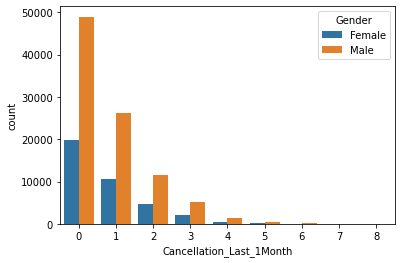

In [96]:
sb.countplot(A.Cancellation_Last_1Month,hue = A.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

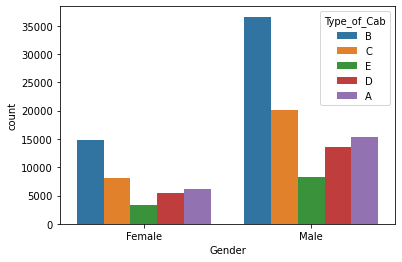

In [97]:
sb.countplot(A.Gender,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Rating', ylabel='Gender'>

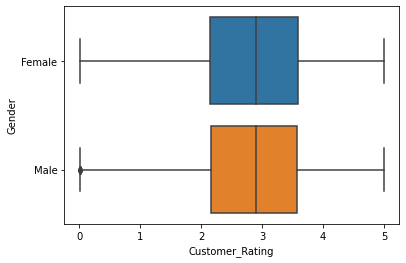

In [98]:
sb.boxplot(A.Customer_Rating,A.Gender)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='Cancellation_Last_1Month'>

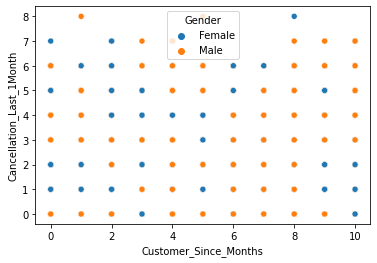

In [99]:
sb.scatterplot(A.Customer_Since_Months,A.Cancellation_Last_1Month,hue=A.Gender)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

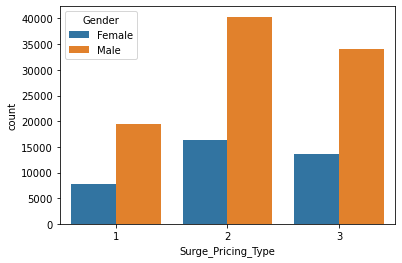

In [100]:
sb.countplot(A.Surge_Pricing_Type,hue = A.Gender)

<AxesSubplot:>

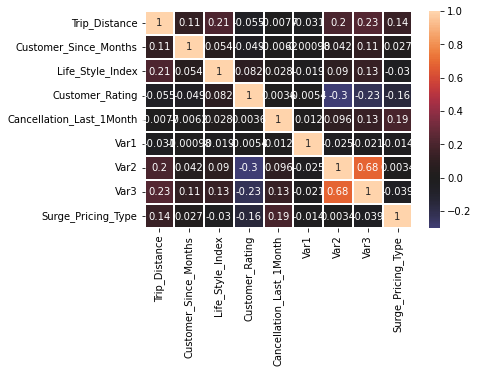

In [101]:
#Checking correlation between columns using heatmap:
sb.heatmap(A.corr(),annot=True,linewidths=0.2,center=0)

In [102]:
#Data Preprocessing: StandardScaler for continous and LabelEncoding for Categorical
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,-1.466568,-1.415166,-1.164984,1.076346,-0.754502,-1.509063,-1.043456,-1.304086,-0.210994
1,-0.577167,1.124052,-0.424456,0.612378,-0.754502,-1.643352,0.962110,0.250555,-0.210994
2,-0.102689,1.124052,2.117065,0.664638,1.173106,-0.099030,0.962110,0.164186,-0.210994
3,0.680141,1.124052,2.117065,0.616202,-0.754502,-0.099030,0.159884,-0.094921,1.143724
4,0.421157,1.124052,0.101737,0.563942,3.100714,-0.770475,-0.441786,2.323410,-0.210994


In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A["Type_of_Cab"]=le.fit_transform(A["Type_of_Cab"])
A["Confidence_Life_Style_Index"] =le.fit_transform(A["Confidence_Life_Style_Index"])
A["Destination_Type"]=le.fit_transform(A["Destination_Type"])
A["Gender"]=le.fit_transform(A["Gender"])
A = A[["Type_of_Cab","Destination_Type","Gender","Confidence_Life_Style_Index"]]
A=A.join(X1)
A.head()

,Type_of_Cab,Destination_Type,Gender,Confidence_Life_Style_Index,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,1,0,0,0,-1.466568,-1.415166,-1.164984,1.076346,-0.754502,-1.509063,-1.043456,-1.304086,-0.210994
1,1,0,1,1,-0.577167,1.124052,-0.424456,0.612378,-0.754502,-1.643352,0.962110,0.250555,-0.210994
2,1,4,1,1,-0.102689,1.124052,2.117065,0.664638,1.173106,-0.099030,0.962110,0.164186,-0.210994
3,2,0,1,1,0.680141,1.124052,2.117065,0.616202,-0.754502,-0.099030,0.159884,-0.094921,1.143724
4,2,0,1,1,0.421157,1.124052,0.101737,0.563942,3.100714,-0.770475,-0.441786,2.323410,-0.210994


In [107]:
A.head(10)

,Type_of_Cab,Destination_Type,Gender,Confidence_Life_Style_Index,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,1,0,0,0,-1.466568,-1.415166,-1.164984,1.076346,-0.754502,-1.509063,-1.043456,-1.304086,-0.210994
1,1,0,1,1,-0.577167,1.124052,-0.424456,0.612378,-0.754502,-1.643352,0.962110,0.250555,-0.210994
2,1,4,1,1,-0.102689,1.124052,2.117065,0.664638,1.173106,-0.099030,0.962110,0.164186,-0.210994
3,2,0,1,1,0.680141,1.124052,2.117065,0.616202,-0.754502,-0.099030,0.159884,-0.094921,1.143724
4,2,0,1,1,0.421157,1.124052,0.101737,0.563942,3.100714,-0.770475,-0.441786,2.323410,-0.210994
5,4,0,1,1,-0.985038,1.124052,2.117065,-0.256924,0.209302,0.639559,2.366007,1.373351,1.143724
6,4,1,1,2,-0.567372,1.124052,-0.305203,0.128016,0.209302,1.378147,-0.241229,-0.008552,-0.210994
7,1,0,1,1,-1.009330,-1.133031,-0.348767,0.747490,-0.754502,2.721036,-1.043456,-1.044980,-0.210994
8,2,0,1,1,2.452675,-0.850895,2.117065,0.302642,-0.754502,-0.099030,1.363224,1.459720,-0.210994
9,3,0,1,1,2.467955,-0.286625,0.122903,-0.413704,0.209302,-0.099030,1.363224,0.682400,1.143724
